<a href="https://colab.research.google.com/github/shin-iji/sklearn-ml/blob/main/ML_Project_WC_PLAYERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mechine Learning Project - League of Legends: World Championship 2019

## Data Explanation

In [ ]:
import pandas as pd

**League of Legends: World Championship 2019** - เป็นข้อมูลการแข่งขันเกม League of Legends บนเวที World Championship ปี 2019 ข้อมูลที่นำมาคิดมาจากข้อมูลเกี่ยวกับผู้เล่นทุกคนที่มีส่วนร่วมในการแข่งทุกเกมในรอบ Play-ins และ Main Event รวมทั้งหมด 1426 แถว โดยค่าที่เราเลือกมาคิดมี 11 คอลัมจากทั้งหมด 91 คอลัม มีดังนี้

1. side : ฝั่งที่ผู้เล่นอยู่
2. position : ตำแหน่งที่ผู้เล่นอยู่
3. team : ทีมที่ผู้เล่นสังกัดอยู่
4. result : ผลแพ้ชนะ ถ้าชนะให้ค่าเป็น 1 ถ้าแพ้ให้ค่าเป็น 0

ต่อไปเป็นข้อมูลที่ผู้เล่นได้กระทำในเกม

5. k : Kill ยอดการสังหารศัตรู
6. d : Death ยอดการตายในเกม
7. a : Assist ยอดการมีส่วนร่วมในการสังหาร
8. fb : First Blood เป็นคนที่สังหารศัตรูแต้มแรกของเกม ถ้าใช่ให้ค่าเป็น 1 ถ้าไม่ใช่ให้ค่าเป็น 0

นอกจากการสังหารศัตรูแล้ว การได้ Objective ในเกมก็เป็นตัวแปรหนึ่งที่มีผลกับความได้เปรียบในเกม ซึ่งจะมีมังกร (Dragon) และบารอน (Baron)

9. teamdragkills : Team Dragon Kill ยอดการสังหารมังกรของทีม
10. teambaronkills : Team Baron Kill ยอดการสังหารบารอนของทีม

สุดท้าย การเงินของผู้เล่นใน 15 นาทีแรก ยิ่งมีเงินในช่วงต้นเกมมาก จะสามารถซื้อไอเท็มที่ดีกว่าได้เร็ว และยิ่งได้เปรียบทีมฝ่ายตรงข้าม

11. totalgold : Total Golds in First 15 Minutes การเงินของผู้เล่นในช่วง 15 นาทีแรก

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/shin-iji/sklearn-ml/main/wc_players.csv')
df.drop(df.columns.difference(['side','position','team','result','k','d','a','fb','teamdragkills','teambaronkills','totalgold']), 1, inplace=True)
df.head()

,side,position,team,result,k,d,a,fb,teamdragkills,teambaronkills,totalgold
0,Blue,Top,DetonatioN FocusMe,0,0,4,4,0,1,0,8407
1,Blue,Jungle,DetonatioN FocusMe,0,1,4,5,0,1,0,7463
2,Blue,Middle,DetonatioN FocusMe,0,1,5,6,0,1,0,8484
3,Blue,ADC,DetonatioN FocusMe,0,3,4,1,0,1,0,10624
4,Blue,Support,DetonatioN FocusMe,0,2,5,2,0,1,0,6249


**ค่าทางสถิติเบื้องต้น**
* ยอดการสังหารศัตรู
  * ค่าเฉลี่ย คือ 3
  * ค่าต่ำสุด คือ 0
  * ค่าสูงสุด คือ 13
* ยอดการตายในเกม
  * ค่าเฉลี่ย คือ 3
  * ค่าต่ำสุด คือ 0
  * ค่าสูงสุด คือ 10
* ยอดการมีส่วนร่วมในการสังหาร
  * ค่าเฉลี่ย คือ 6
  * ค่าต่ำสุด คือ 0
  * ค่าสูงสุด คือ 22
* ยอดการสังหารมังกรของทีม
  * ค่าเฉลี่ย คือ 2
  * ค่าต่ำสุด คือ 0
  * ค่าสูงสุด คือ 6
* ยอดการสังหารบารอนของทีม
  * ค่าเฉลี่ย คือ 1
  * ค่าต่ำสุด คือ 0
  * ค่าสูงสุด คือ 3
* การเงินของผู้ในช่วง 15 นาทีแรก
  * ค่าเฉลี่ย คือ 12044 Gold
  * ค่าต่ำสุด คือ 4219 Gold
  * ค่าสูงสุด คือ 31115 Gold
* ตำแหน่งที่ผู้เล่นอยู่ มีทั้งหมด 5 ตำแหน่ง คือ Top, Jungle, Midle, ADC และ Support
* จำนวนทีมที่เข้าร่วมการแข่งขัน มีทั้งหมด 24 ทีม คือ AHQ e-Sports Club, Cloud9, Clutch Gaming, Damwon Gaming, DetonatioN FocusMe, Flamengo, Fnatic, Funplus Phoenix, G2 Esports, GAM Esports, Griffin, Hong Kong Attitude, Invictus Gaming, Isurus Gaming, J Team, Lowkey Esports, MEGA Esports, Mammoth, Royal Never Give Up, Royal Youth, SK Telecom T1	, Splyce, Team Liquid, Unicorns of Love
* ฝั่งที่ผู้เล่นอยู่ มี 2 ฝั่ง คือ Red Side และ Blue Side เพราะในหนึ่งเกมจะมีการนำผู้เล่นจาก 2 ทีมมาแข่งกัน

In [ ]:
df.describe()

,result,k,d,a,fb,teamdragkills,teambaronkills,totalgold
count,1190.00000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,0.50000,2.648739,2.656303,5.694958,0.100000,2.226891,0.710084,12044.324370
std,0.50021,2.442815,1.816296,3.923176,0.300126,1.509360,0.742203,3705.488287
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4219.000000
25%,0.00000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,9302.500000
50%,0.50000,2.000000,2.000000,5.000000,0.000000,2.000000,1.000000,11693.500000
75%,1.00000,4.000000,4.000000,8.000000,0.000000,3.000000,1.000000,14541.500000
max,1.00000,13.000000,10.000000,22.000000,1.000000,6.000000,3.000000,31115.000000


In [ ]:
df.groupby('position').count()

,side,team,result,k,d,a,fb,teamdragkills,teambaronkills,totalgold
position,,,,,,,,,,
ADC,238,238,238,238,238,238,238,238,238,238
Jungle,238,238,238,238,238,238,238,238,238,238
Middle,238,238,238,238,238,238,238,238,238,238
Support,238,238,238,238,238,238,238,238,238,238
Top,238,238,238,238,238,238,238,238,238,238


In [ ]:
df.groupby('team').count()

,side,position,result,k,d,a,fb,teamdragkills,teambaronkills,totalgold
team,,,,,,,,,,
AHQ e-Sports Club,30,30,30,30,30,30,30,30,30,30
Cloud9,30,30,30,30,30,30,30,30,30,30
Clutch Gaming,65,65,65,65,65,65,65,65,65,65
Damwon Gaming,90,90,90,90,90,90,90,90,90,90
DetonatioN FocusMe,20,20,20,20,20,20,20,20,20,20
Flamengo,25,25,25,25,25,25,25,25,25,25
Fnatic,50,50,50,50,50,50,50,50,50,50
Funplus Phoenix,90,90,90,90,90,90,90,90,90,90
G2 Esports,90,90,90,90,90,90,90,90,90,90


In [ ]:
df.groupby('side').count()

,position,team,result,k,d,a,fb,teamdragkills,teambaronkills,totalgold
side,,,,,,,,,,
Blue,595,595,595,595,595,595,595,595,595,595
Red,595,595,595,595,595,595,595,595,595,595


## Data Visualization

In [ ]:
import seaborn as sns

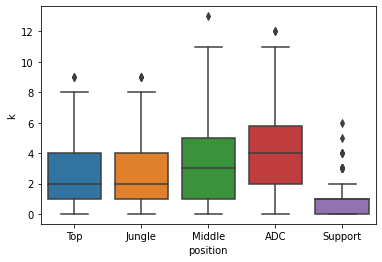

In [ ]:
boxplot = sns.boxplot(x = 'position', y = 'k', data = df) 

จากกราฟแสดงให้เห็นว่า ตำแหน่งทำสามารถสังหารศัตรูได้มากกว่าตำแหน่งอื่นๆในเกมคือ ADC รองลงมาคือ Middle ส่วน Top กับ Jungle มียอดที่ใกล้เคียงกัน และ Support มียอดที่น้อยที่สุด (ซึ่งถูกต้องแล้วเพราะ Support มีหน้าที่ช่วยเหลือ ADC หรือเพื่อนร่วมทีมตำแหน่งอื่นๆให้สังหารศัตรูได้)

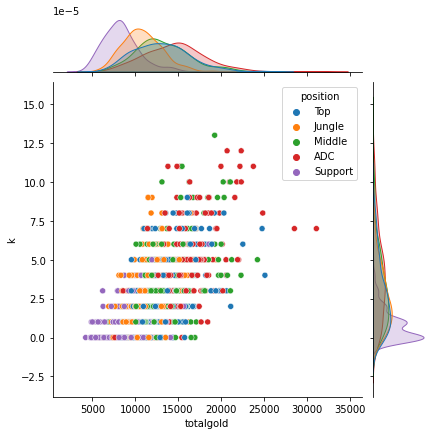

In [ ]:
jointplot = sns.jointplot(data=df, x="totalgold", y="k", hue="position")

จากกราฟความสัมพันธ์ระหว่างยอดการสังหารตลอดเกมกับการเงินใน 15 นาทีแรก แสดงให้เห็นว่า ผู้เล่นตำแหน่ง Support จะมียอดการสังหารที่น้อย ทำให้การเงินน้อยตามไปด้วย ในขณะที่ตำแหน่ง ADC จะมียอดการสังหารที่สูง การเงินก็สูงตามไปด้วย

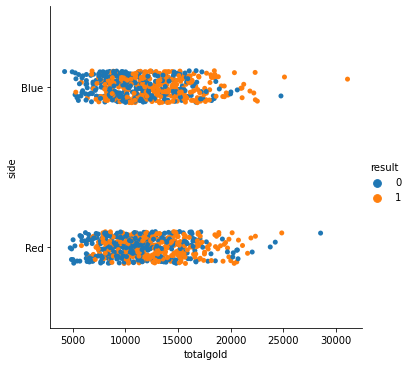

In [ ]:
catplot = sns.catplot(x="totalgold", y="side", hue="result", data=df)

จากกราฟความสัมพันธ์ระหว่างฝั่ง Blue และ Red กับการเงินใน 15 นาทีแรก แสดงให้เห็นว่า ทีมฝ่าย Blue มีโอกาสชนะมากกว่าฝ่าย Red และ ทีมมีการการเงินที่สูงก็ยิ่งมีโอกาสชนะ แต่ก็มีโอกาสแพ้อยู่บ้างเช่นกัน ทำให้การชนะเกมไม่ได้ขึ้นอยู่กับการได้เปรียบของการเงินใน 15 นาทีเสียทีเดียว

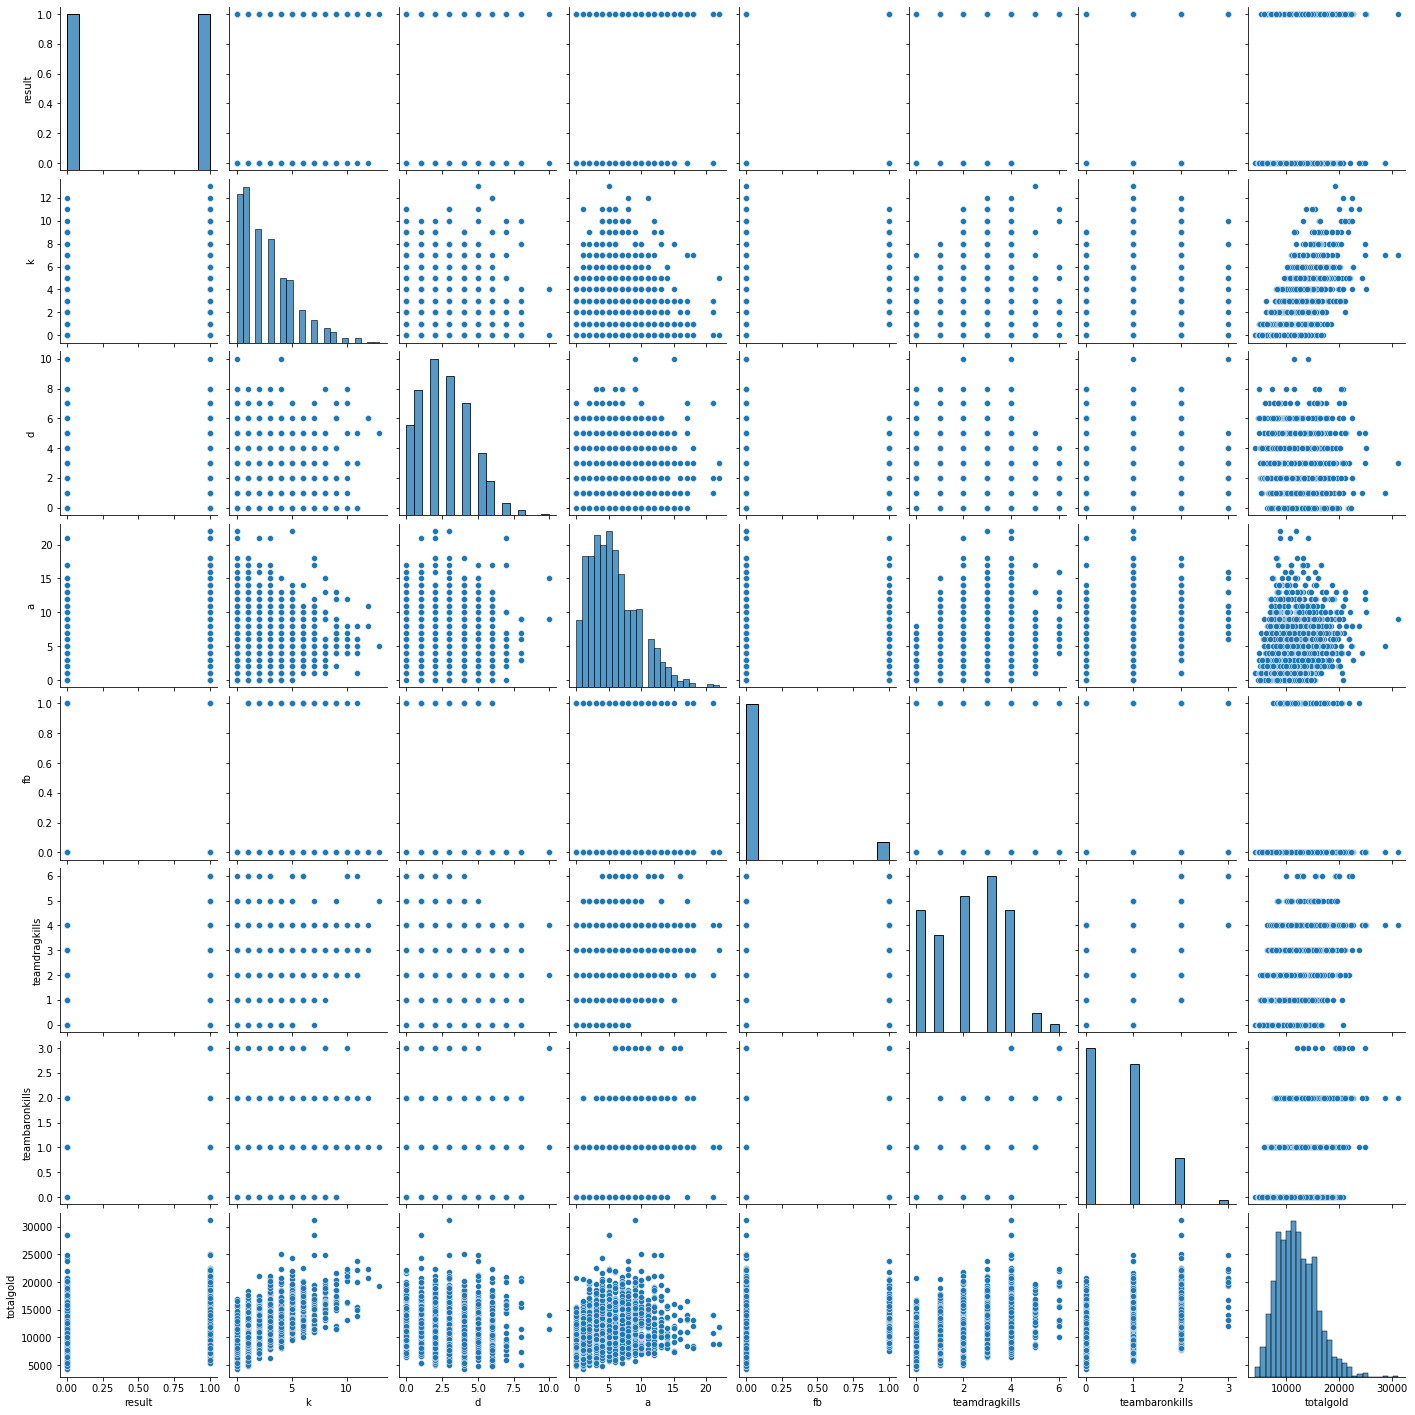

In [ ]:
pairplot = sns.pairplot(data=df)

## Seperate Data to Train and Test Set

แบ่งข้อมูลเป็น 2 ชุด โดยการแบ่งได้เปลี่ยนค่าฝั่ง Blue และ Red เป็น 0 และ 1 จากนั้นนำมาแบ่งโดยใช้ library จาก sklearn ทำการแบ่งจำนวน test_set เป็น 30% และ train_set เป็น 70% และทำการ random

In [ ]:
df['side'].replace('Blue', 0,inplace=True)
df['side'].replace('Red' , 1,inplace=True)

In [ ]:
X = df[['side','k','d','a','fb','teamdragkills','teambaronkills','totalgold']]
y = df['result']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(833, 8)
(357, 8)


##Feature Scaling

คือ การปรับคุณสมบัติต่างๆที่สามารถนำมาใช้กับปรับขนาดหรือค่าต่างๆได้ อย่างที่หยิบเลือกมาใช้คือ การลดขนาดให้เป็นมาตรฐานต่ำสุดสูงสุด (StandardScaler) เป็นการปรับขนาดหรือปรับมาตรฐาน min-max

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

## Model Compare

เลือก Model ในประเภท Classification Model มา 5 Model เพื่อทำการเปรียบเทียบกัน ดังนี้
 
1. Decision Tree
2. Logistic Regression
3. Support Vector Machine
4. Neural Network
5. Random Forest

### Decision Tree

#### Fit the Model

ทำการฝึกสอน Model โดยใช้ Train Set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=None)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Save Model

ทำการเซฟโมเดลเก็บไว้ชื่อ finalize_tree.model

In [ ]:
from sklearn.externals import joblib
joblib.dump(tree,'finalized_tree.model')

['finalized_tree.model']

#### Load and Predict Model

ทำการนำ Model มา Predict กับ Test Set

In [ ]:
finalized_tree = joblib.load('finalized_tree.model')

In [ ]:
prediction_tree = finalized_tree.predict(X_test)
d = {'prediction':prediction_tree,'y_test':y_test}
df_pred = pd.DataFrame(d)

In [ ]:
df_pred.head()

,prediction,y_test
390,1,1
247,1,1
260,0,1
155,0,0
984,1,0


In [ ]:
df_pred[df_pred['prediction'] != df_pred['y_test']].count()

prediction    37
y_test        37
dtype: int64

#### Summary

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_tree))
print('ACC',accuracy_score(y_test, prediction_tree))
print(classification_report(y_test, prediction_tree))

[[167  19]
 [ 18 153]]
ACC 0.896358543417367
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       186
           1       0.89      0.89      0.89       171

    accuracy                           0.90       357
   macro avg       0.90      0.90      0.90       357
weighted avg       0.90      0.90      0.90       357



จากการเทรนข้างต้น สามารถสรุป Model ออกมาเป็น Confusion Matrix ได้ดังนี้
* True Positive : 167
* False Negative : 19
* False Positive : 18
* True Negative : 153

ได้ค่า ACC หรือ Accuracy ของข้อมูลออกมาเป็น 0.896358543417367

Classification Report
* Precision : ค่าวัดความแม่นยำของข้อมูล (พิจารณาแยกทีละคลาส)
* Recall : ค่าวัดความถูกต้องของ Model (พิจารณาแยกทีละคลาส)
* Accuracy : ค่าวัดความถูกต้องของ Model (พิจารณารวมทุกคลาส)
* F1-Score : ค่าเฉลี่ยแบบ Harmonic Mean ระหว่าง Precision และ Recall (สร้าง F1 ขึ้นมาเพื่อเป็น Single Metric ที่วัดความสามารถของ Model)

### Logistic Regression

#### Fit the Model

ทำการฝึกสอน Model โดยใช้ Train Set

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Save Model

ทำการเซฟโมเดลเก็บไว้ชื่อ finalize_lr.model

In [ ]:
from sklearn.externals import joblib
joblib.dump(lr,'finalized_lr.model')

['finalized_lr.model']

#### Load and Predict Model

ทำการนำ Model มา Predict กับ Test Set

In [ ]:
finalized_lr = joblib.load('finalized_lr.model')

In [ ]:
prediction_lr = finalized_lr.predict(X_test)
d = {'prediction':prediction_lr,'y_test':y_test}
df_pred = pd.DataFrame(d)

In [ ]:
df_pred.head()

,prediction,y_test
390,1,1
247,1,1
260,1,1
155,0,0
984,0,0


In [ ]:
df_pred[df_pred['prediction'] != df_pred['y_test']].count()

prediction    31
y_test        31
dtype: int64

#### Summary

In [ ]:
print(confusion_matrix(y_test,prediction_lr))
print('ACC',accuracy_score(y_test, prediction_lr))
print(classification_report(y_test, prediction_lr))

[[169  17]
 [ 14 157]]
ACC 0.9131652661064426
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       186
           1       0.90      0.92      0.91       171

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357



จากการเทรนข้างต้น สามารถสรุป Model ออกมาเป็น Confusion Matrix ได้ดังนี้
* True Positive : 169
* False Negative : 17
* False Positive : 14
* True Negative : 157

ได้ค่า ACC หรือ Accuracy ของข้อมูลออกมาเป็น 0.9131652661064426

Classification Report
* Precision : ค่าวัดความแม่นยำของข้อมูล (พิจารณาแยกทีละคลาส)
* Recall : ค่าวัดความถูกต้องของ Model (พิจารณาแยกทีละคลาส)
* Accuracy : ค่าวัดความถูกต้องของ Model (พิจารณารวมทุกคลาส)
* F1-Score : ค่าเฉลี่ยแบบ Harmonic Mean ระหว่าง Precision และ Recall (สร้าง F1 ขึ้นมาเพื่อเป็น Single Metric ที่วัดความสามารถของ Model)

### Support Vector Mechine

#### Fit the Model

ทำการฝึกสอน Model โดยใช้ Train Set

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Save Model

ทำการเซฟโมเดลเก็บไว้ชื่อ finalize_svm.model

In [ ]:
from sklearn.externals import joblib
joblib.dump(svm,'finalized_svm.model')

['finalized_svm.model']

#### Load and Predict Model

ทำการนำ Model มา Predict กับ Test Set

In [ ]:
finalized_svm = joblib.load('finalized_svm.model')

In [ ]:
prediction_svm = finalized_svm.predict(X_test)
d = {'prediction':prediction_svm,'y_test':y_test}
df_pred = pd.DataFrame(d)

In [ ]:
df_pred.head()

,prediction,y_test
390,1,1
247,1,1
260,1,1
155,0,0
984,0,0


In [ ]:
df_pred[df_pred['prediction'] != df_pred['y_test']].count()

prediction    31
y_test        31
dtype: int64

#### Summary

In [ ]:
print(confusion_matrix(y_test,prediction_svm))
print('ACC',accuracy_score(y_test, prediction_svm))
print(classification_report(y_test, prediction_svm))

[[165  21]
 [ 10 161]]
ACC 0.9131652661064426
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       186
           1       0.88      0.94      0.91       171

    accuracy                           0.91       357
   macro avg       0.91      0.91      0.91       357
weighted avg       0.91      0.91      0.91       357



จากการเทรนข้างต้น สามารถสรุป Model ออกมาเป็น Confusion Matrix ได้ดังนี้
* True Positive : 166
* False Negative : 21
* False Positive : 10
* True Negative : 161

ได้ค่า ACC หรือ Accuracy ของข้อมูลออกมาเป็น 0.9131652661064426

Classification Report
* Precision : ค่าวัดความแม่นยำของข้อมูล (พิจารณาแยกทีละคลาส)
* Recall : ค่าวัดความถูกต้องของ Model (พิจารณาแยกทีละคลาส)
* Accuracy : ค่าวัดความถูกต้องของ Model (พิจารณารวมทุกคลาส)
* F1-Score : ค่าเฉลี่ยแบบ Harmonic Mean ระหว่าง Precision และ Recall (สร้าง F1 ขึ้นมาเพื่อเป็น Single Metric ที่วัดความสามารถของ Model)

### Neural Network

#### Fit the Model

ทำการฝึกสอน Model โดยใช้ Train Set

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
nn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Save Model

ทำการเซฟโมเดลเก็บไว้ชื่อ finalize_nn.model

In [ ]:
from sklearn.externals import joblib
joblib.dump(nn,'finalized_nn.model')

['finalized_nn.model']

#### Load and Predict Model

ทำการนำ Model มา Predict กับ Test Set

In [ ]:
finalized_nn = joblib.load('finalized_nn.model')

In [ ]:
prediction_nn = finalized_nn.predict(X_test)
d = {'prediction':prediction_nn,'y_test':y_test}
df_pred = pd.DataFrame(d)

In [ ]:
df_pred.head()

,prediction,y_test
390,1,1
247,1,1
260,0,1
155,0,0
984,0,0


In [ ]:
df_pred[df_pred['prediction'] != df_pred['y_test']].count()

prediction    37
y_test        37
dtype: int64

#### Summary

In [ ]:
print(confusion_matrix(y_test,prediction_nn))
print('ACC',accuracy_score(y_test, prediction_nn))
print(classification_report(y_test, prediction_nn))

[[163  23]
 [ 14 157]]
ACC 0.896358543417367
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       186
           1       0.87      0.92      0.89       171

    accuracy                           0.90       357
   macro avg       0.90      0.90      0.90       357
weighted avg       0.90      0.90      0.90       357



จากการเทรนข้างต้น สามารถสรุป Model ออกมาเป็น Confusion Matrix ได้ดังนี้
* True Positive : 164
* False Negative : 23
* False Positive : 14
* True Negative : 157

ได้ค่า ACC หรือ Accuracy ของข้อมูลออกมาเป็น 0.896358543417367

Classification Report
* Precision : ค่าวัดความแม่นยำของข้อมูล (พิจารณาแยกทีละคลาส)
* Recall : ค่าวัดความถูกต้องของ Model (พิจารณาแยกทีละคลาส)
* Accuracy : ค่าวัดความถูกต้องของ Model (พิจารณารวมทุกคลาส)
* F1-Score : ค่าเฉลี่ยแบบ Harmonic Mean ระหว่าง Precision และ Recall (สร้าง F1 ขึ้นมาเพื่อเป็น Single Metric ที่วัดความสามารถของ Model)

### Random Forest

#### Fit the Model

ทำการฝึกสอน Model โดยใช้ Train Set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)  
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Save Model

ทำการเซฟโมเดลเก็บไว้ชื่อ finalize_rf.model

In [ ]:
from sklearn.externals import joblib
joblib.dump(rf,'finalized_rf.model')

['finalized_rf.model']

#### Load and Predict Model

ทำการนำ Model มา Predict กับ Test Set

In [ ]:
finalized_rf = joblib.load('finalized_rf.model')

In [ ]:
prediction_rf = finalized_rf.predict(X_test)
d = {'prediction':prediction_rf,'y_test':y_test}
df_pred = pd.DataFrame(d)

In [ ]:
df_pred.head()

,prediction,y_test
390,1,1
247,1,1
260,1,1
155,0,0
984,0,0


In [ ]:
df_pred[df_pred['prediction'] != df_pred['y_test']].count()

prediction    29
y_test        29
dtype: int64

#### Summary

In [ ]:
print(confusion_matrix(y_test,prediction_rf))
print('ACC ',accuracy_score(y_test, prediction_rf))
print(classification_report(y_test, prediction_rf))

[[165  21]
 [  8 163]]
ACC  0.9187675070028011
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       186
           1       0.89      0.95      0.92       171

    accuracy                           0.92       357
   macro avg       0.92      0.92      0.92       357
weighted avg       0.92      0.92      0.92       357



จากการเทรนข้างต้น สามารถสรุป Model ออกมาเป็น Confusion Matrix ได้ดังนี้
* True Positive : 165
* False Negative : 21
* False Positive : 8
* True Negative : 163

ได้ค่า ACC หรือ Accuracy ของข้อมูลออกมาเป็น 0.9187675070028011

Classification Report
* Precision : ค่าวัดความแม่นยำของข้อมูล (พิจารณาแยกทีละคลาส)
* Recall : ค่าวัดความถูกต้องของ Model (พิจารณาแยกทีละคลาส)
* Accuracy : ค่าวัดความถูกต้องของ Model (พิจารณารวมทุกคลาส)
* F1-Score : ค่าเฉลี่ยแบบ Harmonic Mean ระหว่าง Precision และ Recall (สร้าง F1 ขึ้นมาเพื่อเป็น Single Metric ที่วัดความสามารถของ Model)

## Ensemble

### Select Model by using Cross Validation

เลือกโมเดลโดยการใช้ค่า Cross Validation

In [ ]:
set_model = [tree, lr, svm, nn, rf]
score_model = []
for model in set_model:
  score_model.append(cross_val_score(estimator=model,X=X_train,y=y_train,cv=10,scoring='accuracy'))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
for model in score_model:
    print(model.mean())

0.8654761904761905
0.9148020654044752
0.9124211130235228
0.9051635111876075
0.9147160068846816


ได้ค่า Cross Validation ของแต่ละ Model ออกมาเป็น
* Decision Tree : 0.8654761904761905
* Logistic Regression : 0.9148020654044752
* Support Vector Machine : 0.9124211130235228
* Neural Network : 0.9051635111876075
* Random Forest : 0.9147160068846816

### Fit the Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

จากค่า Cross Validation ข้างต้นจึงเลือกโมเดล Logistic Regression, Support Vector Machine และ Random Forest มาใช้

In [ ]:
estimators=[
            ('lr',lr),
            ('svm',svm),
            ('rf',rf),
            ]
ensemble = VotingClassifier(estimators, voting='hard')

ทำการฝึกสอน Model โดยใช้ Train Set

In [ ]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  d...
                                                     criterion='gini',
    

### Save Model

ทำการเซฟโมเดลเก็บไว้ชื่อ finalize_ensemble.model

In [ ]:
from sklearn.externals import joblib
joblib.dump(ensemble,'finalized_ensemble.model')

['finalized_ensemble.model']

### Load and Predict Model

ทำการนำ Model มา Predict กับ Test Set

In [ ]:
finalized_ensemble=joblib.load('finalized_ensemble.model')

In [ ]:
prediction_ensemble = finalized_ensemble.predict(X_test)
d = {'prediction':prediction_ensemble,'y_test':y_test}
df_pred = pd.DataFrame(d)

In [ ]:
df_pred.head()

,prediction,y_test
390,1,1
247,1,1
260,1,1
155,0,0
984,0,0


In [ ]:
df_pred[df_pred['prediction'] != df_pred['y_test']].count()

prediction    30
y_test        30
dtype: int64

### Summary

In [ ]:
print(confusion_matrix(y_test,prediction_ensemble))
print('ACC ',accuracy_score(y_test, prediction_ensemble))
print(classification_report(y_test, prediction_ensemble))

[[167  19]
 [ 11 160]]
ACC  0.9159663865546218
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       186
           1       0.89      0.94      0.91       171

    accuracy                           0.92       357
   macro avg       0.92      0.92      0.92       357
weighted avg       0.92      0.92      0.92       357



จากการเทรนข้างต้น สามารถสรุป Model ออกมาเป็น Confusion Matrix ได้ดังนี้
* True Positive : 167
* False Negative : 19
* False Positive : 21
* True Negative : 160

ได้ค่า ACC หรือ Accuracy ของข้อมูลออกมาเป็น 0.9159663865546218

Classification Report
* Precision : ค่าวัดความแม่นยำของข้อมูล (พิจารณาแยกทีละคลาส)
* Recall : ค่าวัดความถูกต้องของ Model (พิจารณาแยกทีละคลาส)
* Accuracy : ค่าวัดความถูกต้องของ Model (พิจารณารวมทุกคลาส)
* F1-Score : ค่าเฉลี่ยแบบ Harmonic Mean ระหว่าง Precision และ Recall (สร้าง F1 ขึ้นมาเพื่อเป็น Single Metric ที่วัดความสามารถของ Model)

## Result

Model ที่นำมาเทรน
* Decision Tree : 0.8654761904761905
* Logistic Regression : 0.9148020654044752
* Support Vector Machine : 0.9124211130235228
* Neural Network : 0.9051635111876075
* Random Forest : 0.9147160068846816

จากนั้นนำ Model ได้แก่ Logistic Regression, Support Vector Machine และ Random Forest มาทำ Ensemble : 0.9159663865546218

สรุปผลคือรูปแบบที่ทำนายได้ดีที่สุดคือ **Ensemble**